# OAK enrichment command

This notebook is intended as a supplement to the [main OAK CLI docs](https://incatools.github.io/ontology-access-kit/cli.html).

This notebook provides examples for the `enrichment` command which produces a summary of ontology classes that are enriched in the associations for an input set of entities.

See also the end of the [Command Line Tutorial](https://doi.org/10.5281/zenodo.7708963)

## Help Option

You can get help on any OAK command using `--help`

In [1]:
!runoak enrichment --help

Usage: runoak enrichment [OPTIONS] [TERMS]...

  Run class enrichment analysis.

  Given a sample file of identifiers (e.g. gene IDs), plus a set of
  associations (e.g. gene to term associations, return the terms that are
  over-represented in the sample set.

  Example:

      runoak -i sqlite:obo:uberon -g gene2anat.txt -G g2t enrichment -U my-
      genes.txt -O csv

  This runs an enrichment using Uberon on my-genes.txt, using the
  gene2anat.txt file as the association file (assuming simple gene-to-term
  format). The output is in CSV format.

  It is recommended you always provide a background set, including all the
  entity identifiers considered in the experiment.

  You can specify --filter-redundant to filter out redundant terms. This will
  block reporting of any terms that are either subsumed by or subsume a lower
  p-value term that is already reported.

  For a full example, see:

     https://github.com/INCATools/ontology-access-
     kit/blob/main/notebooks/Commands/En

## Download example file and setup

We will use the HPO Association file

In [2]:
!curl -L -s http://purl.obolibrary.org/obo/hp/hpoa/genes_to_phenotype.txt > input/hpoa_g2p.tsv

next we will set up an hpo alias

In [3]:
alias hp runoak -i sqlite:obo:hp

Test this out by querying for associations for a particular gene.

We need to pass in the association file we downloaded, as well as specify the file type (with `-G`):

In [4]:
hp -G hpoa_g2p -g input/hpoa_g2p.tsv associations -Q subject NCBIGene:8192 -O csv | head

subject	subject_label	predicate	object	object_label	property_values	predicate_label	negated	publications	primary_knowledge_source	aggregator_knowledge_source	subject_closure	subject_closure_label	object_closure	object_closure_label
NCBIGene:8192	None	None	HP:0001250	None		None	None		None	None				
NCBIGene:8192	None	None	HP:0000013	None		None	None		None	None				
NCBIGene:8192	None	None	HP:0000007	None		None	None		None	None				
NCBIGene:8192	None	None	HP:0010464	None		None	None		None	None				
NCBIGene:8192	None	None	HP:0008232	None		None	None		None	None				
NCBIGene:8192	None	None	HP:0011969	None		None	None		None	None				
NCBIGene:8192	None	None	HP:0004322	None		None	None		None	None				
NCBIGene:8192	None	None	HP:0000786	None		None	None		None	None				
NCBIGene:8192	None	None	HP:0000815	None		None	None		None	None				


## Enrichment

We will perform enrichment using a set of genes known to be associated with Ehler-Danlos Syndrome (EDS).

The gene list is here:

- [input/eds-genes-ncbigene.tsv](input/eds-genes-ncbigene.tsv)

Let's take a look at them:

In [5]:
!cat input/eds-genes-ncbigene.tsv

id	label
NCBIGene:7148	TNXB
NCBIGene:715	C1R
NCBIGene:716	C1S
NCBIGene:126792	B3GALT6
NCBIGene:55033	FKBP14
NCBIGene:91252	SLC39A13
NCBIGene:29940	DSE
NCBIGene:1303	COL12A1
NCBIGene:9509	ADAMTS2
NCBIGene:1278	COL1A2
NCBIGene:1281	COL3A1
NCBIGene:1289	COL5A1
NCBIGene:1290	COL5A2
NCBIGene:84627	ZNF469
NCBIGene:113189	CHST14
NCBIGene:165	AEBP1
NCBIGene:5351	PLOD1
NCBIGene:11285	B4GALT7
NCBIGene:11107	PRDM5


### Running the `enrichment` command

Next we will run the command itself. Note we use two sets of parameters

- global OAK parameters:
    - the format of the associations (`-G`), here using the HPOA gene to phenotype format
    - the path to the association file (`-g`), here the gp2 file we downloaded earlier
- local parameters for the `enrichment` command
     - the set of genes to be enriched (via `-U` or `--sample-file`)
     - the output format for the results (via `-O` or `--output-type`) - here a TSV, but could also be YAML, RDF
     - the `--autolabel` option that will do additional HPO queries to give the names of each term
     - the output file via `-o` (`--output`)

In [6]:
hp -G hpoa_g2p -g input/hpoa_g2p.tsv enrichment -U input/eds-genes-ncbigene.tsv -O csv --autolabel -o output/eds-genes-enriched.tsv

### Examining the results

The best way to look at TSVs in a notebook such as this one is to use pandas to load as a dataframe.
Note however that in most scenarios where you use the command line, this would *not* be wrapped in a notebook,
and you could use your favorite TSV/CSV tool for exploring the results

In [7]:
import pandas as pd

In [8]:
df=pd.read_csv("output/eds-genes-enriched.tsv", sep="\t")
df

,class_id,p_value,class_label,rank,p_value_adjusted,false_discovery_rate,fold_enrichment,probability,sample_count,sample_total,background_count,background_total,ancestor_of_more_informative_result,descendant_of_more_informative_result
0,HP:0000974,2.121426e-37,Hyperextensible skin,1,2.895747e-34,NaN,NaN,NaN,19,19,68,5011,NaN,NaN
1,HP:0001075,1.245666e-36,Atrophic scars,2,1.700334e-33,NaN,NaN,NaN,17,19,37,5011,NaN,NaN
2,HP:0008067,9.834712e-29,Abnormally lax or hyperextensible skin,3,1.342438e-25,NaN,NaN,NaN,19,19,177,5011,True,NaN
3,HP:0100699,1.916985e-28,Scarring,4,2.616685e-25,NaN,NaN,NaN,19,19,183,5011,True,NaN
4,HP:0004334,7.330381e-28,Dermal atrophy,5,1.000597e-24,NaN,NaN,NaN,17,19,102,5011,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,HP:0010488,3.040076e-05,Aplasia/Hypoplasia of the palmar creases,160,4.149704e-02,NaN,NaN,NaN,3,19,17,5011,NaN,True
160,HP:0000014,3.062457e-05,Abnormality of the bladder,161,4.180254e-02,NaN,NaN,NaN,9,19,494,5011,True,NaN
161,HP:0011844,3.186952e-05,Abnormal appendicular skeleton morphology,162,4.350189e-02,NaN,NaN,NaN,16,19,1853,5011,True,NaN
162,HP:0033353,3.286903e-05,Abnormal blood vessel morphology,163,4.486623e-02,NaN,NaN,NaN,12,19,967,5011,True,True


### Plotting the results

OAK doesn't have any command line plotting capabilities yet, but you can easily use external tools. Here we
show how to plot the results using matplotlib.

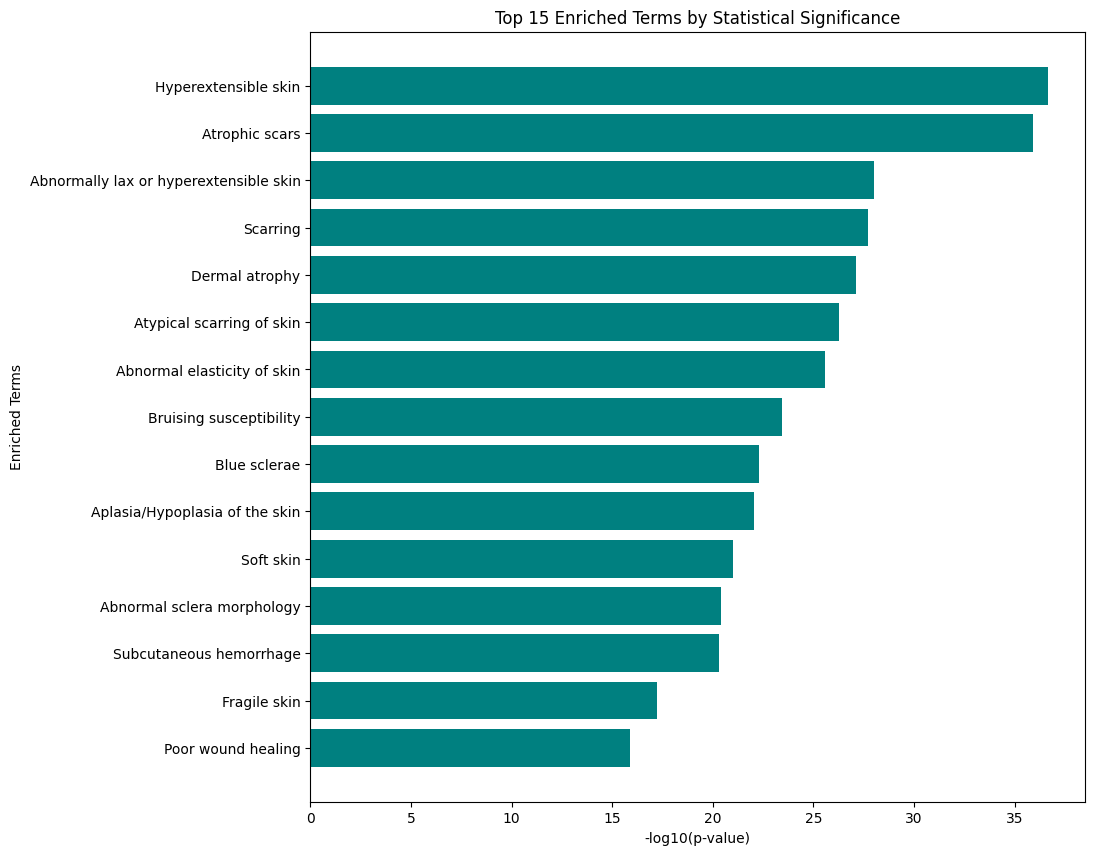

In [9]:
import matplotlib.pyplot as plt
import numpy as np

data = df.copy()

# Transform p-values for better visualization
data['negative_log10_p_value'] = -np.log10(data['p_value'])

# Sort data by transformed p-value
data_sorted = data.sort_values('negative_log10_p_value', ascending=True)

# Select top 15 terms with the highest significance
top_terms = data_sorted.nlargest(15, 'negative_log10_p_value')

# Plotting the horizontal bar chart for the top 15 terms
plt.figure(figsize=(10, 10))
plt.barh(top_terms['class_label'], top_terms['negative_log10_p_value'], color='teal')
plt.xlabel('-log10(p-value)')
plt.ylabel('Enriched Terms')
plt.title('Top 15 Enriched Terms by Statistical Significance')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


The results here should not be surprising - we already know that hyperextensible skin is a hallmark of EDS,
but it's good to see this confirmed!

We used a somewhat artificial gene set here, but in reality gene sets derived e.g. from gene expression will be
more messy and signals weaker.

### Visualizing results in a graph form

We can use the OAK `viz` command to visualize the placement of the enriched terms in the graph.

Because graph visualization can get messy, we'll take the top 5 results (they are already sorted):

In [22]:
!head -5 output/eds-genes-enriched.tsv > output/eds-genes-enriched-top-5.tsv

Next run this through `viz`. Note that most OAK commands take as input either term lists,
or term *query* lists, where queries can include expressions with functions like `.idfile`:

In [25]:
hp viz -p i .idfile output/eds-genes-enriched-top-5.tsv -O png -o output/eds-genes-enriched-top-5.png

![img](output/eds-genes-enriched-top-5.png)

At this time there isn't an easy way to show the p-value visually, but this may be added later.

When we visualize like this we see there is some redundancy. `Scarring` is implied by `Atrophic scars`.

We can run enrichment with `--filter-redundant` on. This will remove more general terms, unless that
term is more significant than all descendants.

In [30]:
hp -G hpoa_g2p -g input/hpoa_g2p.tsv enrichment -U input/eds-genes-ncbigene.tsv -O csv --autolabel  --filter-redundant -o output/eds-genes-enriched-filtered.tsv

In [31]:
!head -5 output/eds-genes-enriched-filtered.tsv > output/eds-genes-enriched-filtered-top-5.tsv

In [32]:
hp viz -p i .idfile output/eds-genes-enriched-filtered-top-5.tsv -O png -o output/eds-genes-enriched-filtered-top-5.png

![img](output/eds-genes-enriched-filtered-top-5.png)

## Normalizing input gene lists

What happens if our input gene IDs use a different system than the associations?

E.g. assume our inputs are HGNC and our association file is NCBIGene

- [input/eds-genes-hgnc.tsv](input/eds-genes-hgnc.tsv)

Let's take a look

In [11]:
!cat input/eds-genes-hgnc.tsv

id	label
HGNC:11976	TNXB
HGNC:1246	C1R
HGNC:1247	C1S
HGNC:17978	B3GALT6
HGNC:18625	FKBP14
HGNC:20859	SLC39A13
HGNC:21144	DSE
HGNC:2188	COL12A1
HGNC:218	ADAMTS2
HGNC:2198	COL1A2
HGNC:2201	COL3A1
HGNC:2209	COL5A1
HGNC:2210	COL5A2
HGNC:23216	ZNF469
HGNC:24464	CHST14
HGNC:303	AEBP1
HGNC:9081	PLOD1
HGNC:930	B4GALT7
HGNC:9349	PRDM5


In [19]:
hp -G hpoa_g2p -g input/hpoa_g2p.tsv enrichment -U input/eds-genes-hgnc.tsv -O csv --autolabel

ValueError: No associations found for subjects


As expected, the command complains that no associations were found for any of the subjects (input genes).

So what do we do? There is a separate command `normalize` that can be used here to normalize an ID list.
Normalize can be used with a number of different ID mapper / normalizer sources. Here we are using it with
the NCATS Translator SRI node normalizer:


In [20]:
!runoak -i translator: normalize .idfile input/eds-genes-hgnc.tsv -M NCBIGene -o output/eds-genes-ncbigene.tsv

In [21]:
!cat output/eds-genes-ncbigene.tsv

id	label
NCBIGene:7148	TNXB
NCBIGene:715	C1R
NCBIGene:716	C1S
NCBIGene:126792	B3GALT6
NCBIGene:55033	FKBP14
NCBIGene:91252	SLC39A13
NCBIGene:29940	DSE
NCBIGene:1303	COL12A1
NCBIGene:9509	ADAMTS2
NCBIGene:1278	COL1A2
NCBIGene:1281	COL3A1
NCBIGene:1289	COL5A1
NCBIGene:1290	COL5A2
NCBIGene:84627	ZNF469
NCBIGene:113189	CHST14
NCBIGene:165	AEBP1
NCBIGene:5351	PLOD1
NCBIGene:11285	B4GALT7
NCBIGene:11107	PRDM5


This is identical to the gene list in the original example, and can be used in the same way